# Sklearn

## Importações

In [3]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# dataset format pyXAI
import numpy as np
import pandas as pd

## Dataset

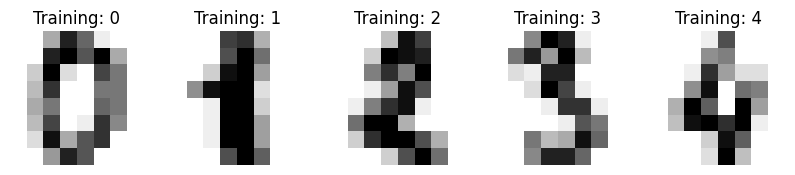

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Treinamento

In [6]:
# achatar as imagens
n_samples = len(digits.images) # quantidade total de amostras
data = digits.images.reshape((n_samples, -1))

# Crie um classificador: um classificador de árvore de decisão
clf = DecisionTreeClassifier()

# divisão dos dados em 50% de treinamento e 50% de subconjuntos de teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# treinando nosso modelo
clf.fit(X_train, y_train)

# previsão do valor do dígito no subconjunto de teste
predicted = clf.predict(X_test)

# Alguns Testes de Validação

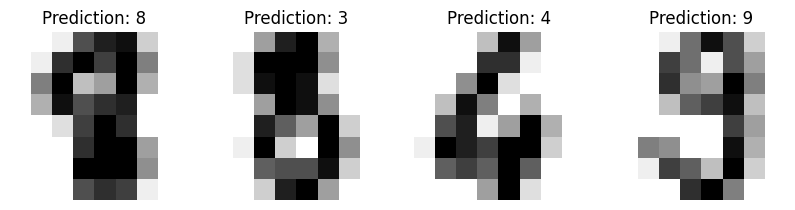

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


In [8]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.81      0.60      0.69        91
           2       0.86      0.73      0.79        86
           3       0.65      0.71      0.68        91
           4       0.83      0.80      0.82        92
           5       0.60      0.74      0.66        91
           6       0.80      0.93      0.86        91
           7       0.86      0.70      0.77        89
           8       0.63      0.65      0.64        88
           9       0.66      0.75      0.70        92

    accuracy                           0.76       899
   macro avg       0.77      0.76      0.76       899
weighted avg       0.77      0.76      0.76       899




Matriz de Confusão:
[[82  0  0  0  1  2  0  0  1  2]
 [ 0 55  5  7  8  1  1  2  5  7]
 [ 1  1 63  7  1  1  3  2  5  2]
 [ 0  4  0 65  0  4  0  3 10  5]
 [ 1  0  0  0 74  6  6  1  3  1]
 [ 0  1  0  0  0 67  4  0  2 17]
 [ 0  2  1  1  0  1 85  0  1  0]
 [ 0  1  0 14  0  8  0 62  3  1]
 [ 0  2  4  3  4  8  7  2 57  1]
 [ 0  2  0  3  1 13  0  0  4 69]]


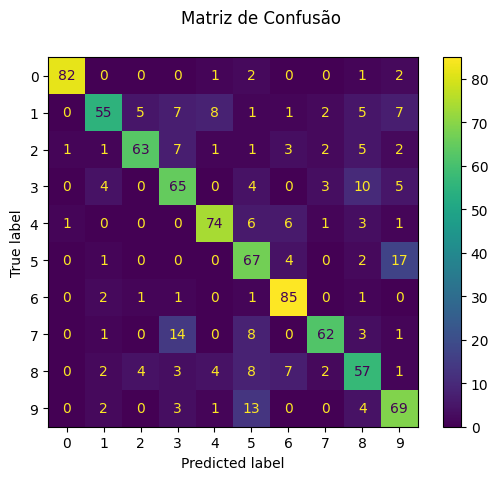

In [9]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Matriz de Confusão")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()


# pyXAI

## Instalçoes e Importações

In [ ]:
!pip install pyxai -q

In [13]:
from pyxai import Learning, Explainer, Tools

In [12]:
feature_names = digits.feature_names


# Carregar o dataset digits
digits = datasets.load_digits()

# Aplanar as imagens para transformar em vetores (igual você já fez antes)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Combinar os dados com as labels (rótulos) e salvar em um dataframe
df = pd.DataFrame(data)
df['label'] = digits.target  # Adiciona a coluna de rótulos

# Salvar o dataframe em um arquivo CSV
dataset_filename = "digits_dataset.csv"
df.to_csv(dataset_filename, index=False)

print(f"Dataset salvo como {dataset_filename}")

Dataset salvo como digits_dataset.csv


#### Explicação Geral

Decision Tree Model: Informa que o modelo utilizado é uma árvore de decisão, confirmando o tipo de algoritmo treinado.

nFeatures: 64: Refere-se ao número de características (features) utilizadas pelo modelo. No caso do dataset de dígitos, cada imagem foi convertida em um vetor de 64 valores (8x8 pixels), então esse número representa a quantidade total de pixels da imagem que são usados como entrada para o modelo.

nNodes: 94: Esse número refere-se à quantidade total de nós na árvore de decisão. Um nó é um ponto de decisão na árvore, onde o modelo escolhe uma característica para fazer uma divisão que separa os dados em diferentes classes.

nVariables: 93: Esse valor representa a quantidade de variáveis ou divisões que o modelo fez ao construir a árvore. Cada vez que a árvore faz uma decisão, ela usa uma variável (um pixel neste caso) para dividir os dados.

In [14]:
learner, model = Learning.import_models(clf, feature_names)


#--------------- Explicador ----------------
#Para a avaliação número 0:
#**Modelo de árvore de decisão**
#nCaracterísticas: 64
#nNós: 94
#nVariáveis: 93

---------------   Explainer   ----------------
For the evaluation number 0:
**Decision Tree Model**
nFeatures: 64
nNodes: 94
nVariables: 94



In [23]:
#instance, prediction = learner.get_instances(model, n=1, correct=True, predictions=[0], dataset="/content/digits_dataset.csv")
# predictions=[0] - label 0
instance, prediction = learner.get_instances(model, n=1, correct=True, predictions=[0],dataset="/content/digits_dataset.csv")
print('Número da Classe: ', prediction)
print('Instância: ', instance)

---------------   Instances   ----------------
number of instances selected: 1
----------------------------------------------
Número da Classe:  0
Instância:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [24]:
explainer = Explainer.decision_tree(model, instance)
print("instance:", instance)


print("""
Esse resultado mostra uma instância (um exemplo) dos dados de dígitos após serem achatados.
Cada valor no array corresponde à intensidade de um pixel em uma imagem 8x8 de um dígito manuscrito.
""")

instance: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Esse resultado mostra uma instância (um exemplo) dos dados de dígitos após serem achatados.
Cada valor no array corresponde à intensidade de um pixel em uma imagem 8x8 de um dígito manuscrito.



In [27]:
if len(explainer.binary_representation) < 15:
    print("binary representation: ", explainer.binary_representation)
else:
  #print("else binary representation: ", explainer.binary_representation)
  pass

print("prediction: ", prediction)
print("len binary representation", len(explainer.binary_representation))


prediction:  0
len binary representation 94


#### Explicaçã da Justificativa Direta

1. len direct: 4

    O número 4 aqui indica que a justificativa direta para a previsão foi composta por quatro regras, ou seja, quatro condições foram necessárias para chegar à decisão final do modelo para essa instância (um dígito específico).

2. is a reason: True

    Isso significa que o conjunto de condições (regras) encontradas é de fato uma justificativa válida para a previsão feita pelo modelo. Ou seja, essas condições explicam adequadamente por que o modelo fez aquela previsão.

3. to features ('pixel_1_5 > 1.0', 'pixel_4_4 <= 0.5', 'pixel_4_5 > 0.5', 'pixel_5_2 > 7.5')

    As regras extraídas da árvore de decisão foram traduzidas em termos de pixels da imagem dos dígitos manuscritos.

    Cada regra representa uma condição baseada na intensidade de um pixel específico da imagem de um dígito (nesse caso, uma imagem 8x8, pois o dataset digits contém imagens 8x8 de números manuscritos).

    Explicação das condições:
        pixel_1_5 > 1.0: O valor do pixel localizado na linha 1 e coluna 5 da imagem deve ser maior que 1.0 para essa justificativa.
        pixel_4_4 <= 0.5: O valor do pixel na linha 4 e coluna 4 da imagem deve ser menor ou igual a 0.5.
        pixel_4_5 > 0.5: O valor do pixel na linha 4 e coluna 5 deve ser maior que 0.5.
        pixel_5_2 > 7.5: O valor do pixel na linha 5 e coluna 2 da imagem deve ser maior que 7.5.

Essas condições representam quais pixels específicos da imagem foram mais relevantes para o modelo ao tomar sua decisão de classificar o dígito. Em uma imagem de um dígito manuscrito, os pixels com valores maiores indicam onde há mais "tinta" (ou traços), e o modelo usa essas informações para decidir qual número o dígito representa.

In [21]:
#justificativa direta"

direct_reason = explainer.direct_reason()
print("\nlen direct:", len(direct_reason))
print("is a reason:", explainer.is_reason(direct_reason))
print("to features", explainer.to_features(direct_reason))



len direct: 4
is a reason: True
to features ('pixel_1_5 > 1.0', 'pixel_4_4 <= 0.5', 'pixel_4_5 > 0.5', 'pixel_5_2 > 7.5')


### Explicação Razão suficiente

1. sufficient_reason = explainer.sufficient_reason(n=1)

    Aqui, o método sufficient_reason está sendo chamado para encontrar uma razão suficiente para a decisão do modelo. A razão suficiente é um conjunto mínimo de regras que, se satisfeitas, levam à mesma previsão.
    O parâmetro n=1 indica que queremos apenas uma dessas razões suficientes.

2. len sufficient_reason: X

    Essa linha imprime o tamanho (quantidade de regras) da razão suficiente encontrada. O número X indica quantas condições (regras) são necessárias para garantir a previsão correta.
    O tamanho da razão suficiente normalmente será menor do que o da razão direta (direct_reason), porque ela busca um conjunto mínimo de regras que ainda são suficientes para justificar a previsão.

3. to features

    explainer.to_features(sufficient_reason) traduz a razão suficiente em termos de características (no caso do conjunto de dados de dígitos, isso significa os pixels da imagem).
    Assim como na explicação anterior, cada regra vai indicar condições sobre a intensidade de certos pixels da imagem. Por exemplo: pixel_1_5 > 1.0.

4. is sufficient_reason (for max 50 checks):

    explainer.is_sufficient_reason(sufficient_reason, n_samples=50) verifica se a razão suficiente realmente é válida.
    Aqui, o método está fazendo até 50 verificações para garantir que a razão suficiente encontrada sempre leve à mesma previsão, independentemente de outras características.
    O resultado será True se a razão suficiente for válida, ou seja, se esse conjunto mínimo de regras sempre leva à mesma previsão que o modelo fez originalmente.

Resumo:

    Razão suficiente é um conjunto mínimo de condições que justifica a previsão do modelo. Enquanto a razão direta pode incluir várias regras, a razão suficiente tenta reduzir essas condições ao menor número possível, sem perder a precisão na previsão.
    O código está verificando se esse conjunto mínimo de regras é realmente suficiente para garantir a previsão correta, fazendo até 50 verificações. Isso ajuda a entender o mínimo necessário que o modelo considera ao classificar os dígitos, tornando o processo de explicação mais eficiente e claro.

In [28]:
# Razão suficiente

sufficient_reason = explainer.sufficient_reason(n=1)
print("\nlen sufficient reason:", len(sufficient_reason))
print("to features", explainer.to_features(sufficient_reason))
print("is sufficient_reason (for max 50 checks): ", explainer.is_sufficient_reason(sufficient_reason, n_samples=50))



len sufficient reason: 4
to features ('pixel_1_5 > 1.0', 'pixel_4_4 <= 0.5', 'pixel_4_5 > 0.5', 'pixel_5_2 > 7.5')
is sufficient_reason (for max 50 checks):  True


### Explicação das razões mínimas, literais necessários e literais relevantes

1. minimal_sufficient_reason

    minimal = explainer.minimal_sufficient_reason(): Esse método busca uma razão suficiente mínima para a previsão do modelo. A ideia aqui é encontrar o conjunto mais reduzido possível de regras (ou condições) que ainda explicam a previsão corretamente.
    O valor minimal: 4 indica que a razão suficiente mínima contém 4 regras, ou seja, são necessárias apenas 4 condições para explicar a previsão feita pelo modelo.
    Esse conjunto de condições é o menor necessário para garantir a previsão.

2. is_sufficient_reason

    Aqui, novamente, o método explainer.is_sufficient_reason está verificando se a razão suficiente mínima é válida, fazendo até 50 verificações.
    O resultado True confirma que essas 4 condições são suficientes para garantir que o modelo faça a mesma previsão em diferentes verificações.

3. necessary_literals

    necessary_literals() retorna os literais necessários. Um literal necessário é uma condição (regra) que deve estar presente para garantir que a previsão do modelo seja a mesma.
    O retorno necessary literals: [-1, 2, 5, 9] indica que os literais (ou regras) associados às posições -1, 2, 5 e 9 são essenciais. Sem essas condições, o modelo não conseguiria fazer a previsão corretamente.
        O literal -1 pode significar uma regra inversa ou um valor relacionado à saída do modelo, enquanto os outros valores indicam a importância de certas características, como pixels da imagem no caso dos dígitos.

4. relevant_literals

    relevant_literals() retorna os literais relevantes, que são condições que podem influenciar a previsão, mas não são essenciais. Elas afetam a decisão, mas podem ser removidas sem alterar o resultado final.
    No seu caso, o retorno é relevant literals: [], o que significa que não há literais relevantes além dos necessários. Em outras palavras, todas as condições usadas pelo modelo são essenciais e não há regras extras que poderiam ser removidas sem impactar a previsão.

In [29]:
minimal = explainer.minimal_sufficient_reason()
print("\nminimal:", len(minimal))
print("is sufficient_reason (for max 50 checks): ", explainer.is_sufficient_reason(sufficient_reason, n_samples=50))

print("\nnecessary literals: ", explainer.necessary_literals())
print("\nrelevant literals: ", explainer.relevant_literals())


minimal: 4
is sufficient_reason (for max 50 checks):  True

necessary literals:  [-1, 2, 5, 9]

relevant literals:  []


### Explicação

Explicação:

    sufficient_reasons_per_attribute: Este método retorna um dicionário que mostra quantas vezes cada literal (ou atributo) contribuiu para formar uma razão suficiente. Em outras palavras, ele mapeia os atributos que foram usados como parte das razões suficientes e quantas razões suficientes envolveram cada um desses atributos.

Interpretação dos resultados:

    O resultado sufficient_reasons_per_attribute: {9: 1, 2: 1, 5: 1, -1: 1} significa que os seguintes atributos/literais estiveram presentes em exatamente uma razão suficiente cada:
        9: Apareceu em uma razão suficiente.
        2: Apareceu em uma razão suficiente.
        5: Apareceu em uma razão suficiente.
        -1: Apareceu em uma razão suficiente.

Isso indica que esses 4 literais (ou atributos) são os únicos responsáveis por formar as razões suficientes, e cada um deles contribuiu exatamente uma vez para a explicação da previsão do modelo.

In [31]:
sufficient_reasons_per_attribute = explainer.n_sufficient_reasons_per_attribute()
print("\nsufficient_reasons_per_attribute:", sufficient_reasons_per_attribute)


sufficient_reasons_per_attribute: {9: 1, 2: 1, 5: 1, -1: 1}


### Explicação: Razões contrastivas são explicações que mostram o que poderia ser diferente nos dados de entrada para que o modelo tivesse dado uma previsão oposta.

    constractive_reasons = explainer.contrastive_reason(n=Explainer.ALL):
        Aqui, o código gera todas as razões contrastivas possíveis para o exemplo analisado.
        Razões contrastivas são basicamente explicações que indicam quais condições precisariam ser modificadas no conjunto de características (ou nos atributos da instância) para que o modelo previsse uma classe diferente.
        O parâmetro n=Explainer.ALL significa que você está pedindo todas as razões contrastivas disponíveis.

    len(constractive_reasons):
        O código imprime a quantidade total de razões contrastivas geradas.
        No seu caso, o valor é 4, ou seja, foram encontradas 4 razões contrastivas possíveis para o modelo.

    Verificação das razões contrastivas:
        O loop a seguir percorre cada uma das razões contrastivas geradas:

        python

    for contrastive in constractive_reasons:
        if not explainer.is_contrastive_reason(contrastive):
            print(f"{contrastive} is not a contrastive reason")
            all_are_contrastive = False

    Para cada razão contrastiva, ele usa a função explainer.is_contrastive_reason() para verificar se aquela razão realmente é válida como uma razão contrastiva.
    Se a razão não for válida, o código imprime que não é uma razão contrastiva e define a variável all_are_contrastive como False.

Resultado final:

    Se todas as razões contrastivas forem válidas, a variável all_are_contrastive permanece como True e a mensagem "All contrastive are ok" é impressa.

In [32]:
constractive_reasons = explainer.contrastive_reason(n=Explainer.ALL)
print("\nnb constractive_reasons:", len(constractive_reasons))

all_are_contrastive = True
for contrastive in constractive_reasons:
    if not explainer.is_contrastive_reason(contrastive):
        print(f"{contrastive} is not a contrastive reason")
        all_are_contrastive = False

if all_are_contrastive:
    print("All contrastive are ok")


nb constractive_reasons: 4
All contrastive are ok
